In [3]:
from read_data import ReadData
import numpy as np
import csv
import haversine

In [4]:
def get_sites_from_county_code(df, county_code):
    f = (df['County Code'] == county_code) & (df['State Code'] == "06")
    return list(df[f]['id'].unique())

def get_one(df, a):
    return df[a].tolist()[0]

In [32]:
f = open("manuscript_images/monitoring_station.csv", "w", newline='')
writer = csv.writer(f)
header = ["ID(State|County|Site code)","Pollutant", "County", "CBSA", "Latitude", 
         "Longitude", "First Date", "Last Date", "Days"]
writer.writerow(header)
pol = ['PM2.5', 'PM10', "O3"]
for idx, pollutant in enumerate(['PM2', 'PM10', "O3"]):
    p = pol[idx]
    obj = ReadData(pollutant, year='2020')
    df = obj.get_pandas_obj()
    df = df[df['Date Local']>='22-01-2020']
    for i in ["037", "111"]:
        for k in get_sites_from_county_code(df, i):
            date_list = df[df['id']==k]['Date Local']
            data_list = df[df['id']==k]
            first_date = date_list.min().strftime('%d-%m-%Y')
            last_date = date_list.max().strftime('%d-%m-%Y')
            city, county = get_one(data_list, 'City'), get_one(data_list, 'County')
            cbsa = get_one(data_list, 'Cbsa')
            lat, lon = get_one(data_list, 'Latitude'), get_one(data_list, 'Longitude')
            parameter = get_one(data_list, 'Parameter')
            row = [k, p, county, cbsa, lat, lon, first_date, last_date, date_list.shape[0]]
            writer.writerow(row)
            print(k)
f.close()

06_037_1201
06_037_4008
06_037_9033
06_037_1302
06_037_4002
06_037_4004
06_037_1602
06_037_2005
06_037_0002
06_037_1103
06_111_0009
06_111_0007
06_111_3001
06_111_2002
06_111_1004
06_037_9033
06_037_0016
06_111_3001
06_111_2002
06_037_1701
06_037_0002
06_037_1602
06_037_1302
06_037_6012
06_037_9033
06_037_0016
06_037_2005
06_037_1201
06_111_2002
06_111_0007
06_111_0009
06_111_1004
06_111_3001


In [20]:
df.columns

Index(['id', 'Date Local', 'Aqi', 'Arithmetic Mean', 'Cbsa', 'Cbsa Code',
       'City', 'County', 'County Code', 'Date Of Last Change', 'Datum',
       'Event Type', 'First Max Hour', 'First Max Value', 'Latitude',
       'Local Site Name', 'Longitude', 'Method', 'Method Code',
       'Observation Count', 'Observation Percent', 'Parameter',
       'Parameter Code', 'Poc', 'Pollutant Standard', 'Sample Duration',
       'Site Address', 'Site Number', 'State', 'State Code',
       'Units Of Measure', 'Validity Indicator'],
      dtype='object')

In [30]:
pol = ['PM2.5', 'PM10', "O3"]
# ['PM2', 'PM10', "O3"]
for idx, pollutant in enumerate(['PM2']):
    p = pol[idx]
    obj = ReadData(pollutant, year='2020')
    df = obj.get_pandas_obj()
    df = df[df['Date Local']>='22-01-2020']
    xticks = []
    data = []
    for i in ["037", "111"]:
        sites = get_sites_from_county_code(df, i)
        xticks.extend(sites)
        
    for k in xticks:
        t = []
        for j in xticks:
            data_list1 = df[df['id']==k]
            data_list2 = df[df['id']==j]
            lat1, lon1 = get_one(data_list1, 'Latitude'), get_one(data_list1, 'Longitude')
            lat2, lon2 = get_one(data_list2, 'Latitude'), get_one(data_list2, 'Longitude')
            distance = haversine.haversine((lat1, lon1), (lat2, lon2))
            t.append(int(distance))
        data.append(t)


In [33]:
data

[[0, 48, 64, 44, 52, 55, 47, 38, 56, 31, 34, 31, 56, 16, 69],
 [48, 0, 90, 4, 4, 7, 20, 31, 39, 23, 82, 72, 97, 64, 115],
 [64, 90, 0, 85, 94, 97, 73, 59, 62, 67, 68, 84, 103, 66, 103],
 [44, 4, 85, 0, 8, 12, 17, 26, 36, 18, 78, 70, 94, 60, 112],
 [52, 4, 94, 8, 0, 3, 23, 34, 42, 27, 86, 76, 99, 67, 118],
 [55, 7, 97, 12, 3, 0, 26, 38, 44, 30, 89, 79, 102, 71, 121],
 [47, 20, 73, 17, 23, 26, 0, 14, 19, 15, 81, 77, 102, 63, 117],
 [38, 31, 59, 26, 34, 38, 14, 0, 18, 11, 69, 68, 94, 53, 107],
 [56, 39, 62, 36, 42, 44, 19, 18, 0, 28, 86, 87, 112, 71, 125],
 [31, 23, 67, 18, 27, 30, 15, 11, 28, 0, 65, 61, 86, 48, 101],
 [34, 82, 68, 78, 86, 89, 81, 69, 86, 65, 0, 22, 34, 18, 38],
 [31, 72, 84, 70, 76, 79, 77, 68, 87, 61, 22, 0, 25, 18, 42],
 [56, 97, 103, 94, 99, 102, 102, 94, 112, 86, 34, 25, 0, 42, 23],
 [16, 64, 66, 60, 67, 71, 63, 53, 71, 48, 18, 18, 42, 0, 53],
 [69, 115, 103, 112, 118, 121, 117, 107, 125, 101, 38, 42, 23, 53, 0]]

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

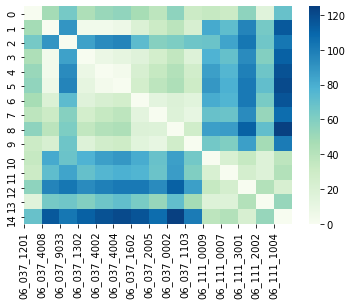

In [36]:
sns.heatmap(data, cmap='GnBu')
plt.xticks(range(len(xticks)), xticks, rotation=90)
plt.show()

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5]


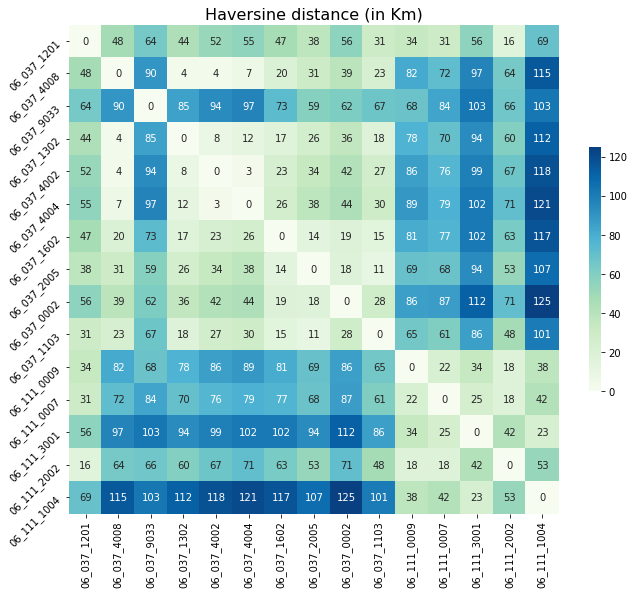

In [48]:
plt.close()
mask = np.triu(np.ones_like(data, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = plt.get_cmap("GnBu")
sns.heatmap(data, annot=True, cmap=cmap,  cbar_kws={"shrink": .5}, square=True,  fmt='g')
# ax.text(-0.04, 1, 'a)', transform=ax.transAxes, size=16, color='green')
plt.title('Haversine distance (in Km)', size=16)
x_t = list(map(lambda x:x+0.5, range(len(xticks))))
print(list(x_t))
plt.xticks(x_t, xticks, rotation=90)
plt.yticks(x_t, xticks,  rotation=45)

plt.savefig("manuscript_images/monitoring_stations_MR.png", dpi=600, bbox_inches='tight')
plt.show()